<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [175]:
# EXECUTIVE SUMMARY 
# Although Rock still dominates the charts in 2000, Rap is trending upwards. 
# The artist with the most tracks in the Top 100 was Jay Z (at 5 tracks)
# None of Jay Z's tracks got into the Top 10 but his last peaking track reached 11, peaking higher than all his prior tracks.
# Given that this track peaked at the last week of 2000, there is a strong probility that this track will peak even higher than #11 
# Although none of the the 17 tracks that reached #1 were rap, 5 of the tracks that peaked between #2-#10 were rap.
# Record labels should keep an eye on whether rap starts to trend more strongly upwards in the future and if so consider investing more in signing and promoting rap artists
# Should consider breaking out components of the 'Rock' genere as it is very broad and includes soem music which could be classified as dance music 

# GENERAL DESCRIPTION OF THE DATA 
# All tracks peaked in 2000.
# 317 tracks by 228 artists. 
# The data is unlikely to be the full data set for all tracks that peaked in the charts in 2000.
# I am assuming that the data that is included in the data set does not differ greatly from what was excluded.
# All tracks peaked in 2000 but 18% of these tracks entered the top 100 in 1999.
# 43% had Rock as a genre, 23% were Country, 18% were Rap, 16% were other genres. 
# Of the17 tracks that peaked at#1s in this data set, 88% had rock for the genre.
# 75% of tracks that peaked between  #2-# 10 have Rock as the genre. 
# Christina Aguilera and Destiny’s Child were the only artists to have more than one #1 (they both had two) and were both classified as Rock.
# Tracks that reached #1 were on average in the charts for 30 weeks, whereas tracks that peaked in the top 100 but outside the top 10 were in the charts for an average of 14 weeks.
# On average, Top 10 tracks take over twice as long to peak (13 weeks) compared to those tracks that peak between #11 - #100
# There is little variability in the average track length between #1s and the rest of the rest of the tracks in the sample.  


In [176]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import os

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [177]:
pwd

'/Users/hanhuang/General Assembly/My Work Projects/Billboard'

In [178]:
df.shape

(317, 83)

In [179]:
# Check Data Types
df.dtypes.head(12)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
dtype: object

In [180]:
df.head(1)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Check Data Types
df.dtypes.head(9)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
dtype: object

In [182]:
# Check null values 
print((df.isnull().sum().head(15)))

year                0
artist.inverted     0
track               0
time                0
genre               0
date.entered        0
date.peaked         0
x1st.week           0
x2nd.week           5
x3rd.week          10
x4th.week          17
x5th.week          25
x6th.week          37
x7th.week          48
x8th.week          57
dtype: int64


In [183]:
# PART 1: DATA CLEAN UP AND FORMATTING 
# 1. Remane columns
# 2. Create new column - For time to peak 
# 3. Create new column - Calculate mean position 
# 4. Create new column - Calculate total weeks in chart
# 5. Create new column - Calculate highest postion
# 6. Create new column - For three ranges of highest position #1, #2-10, #11-100
# 7. Create new columns - Calculates weeks it stayed in the range #1, #1-10
# 8. Create a new column - convert 'time' column into seconds

In [184]:
# 1. Rename columns
df.rename(columns={'artist.inverted':'artist','date.entered':'entered', 'date.peaked':'peaked'}, inplace=True)
df.head(1)

,year,artist,track,time,genre,entered,peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# 2. Create new column - Calculate time to peak  
import datetime
from datetime import timedelta
df['entry_to_peak'] = pd.to_datetime(df['peaked']) - pd.to_datetime(df['entered'])
df['entry_to_peak'].head(1)

0   56 days
Name: entry_to_peak, dtype: timedelta64[ns]

In [186]:
# 3. Create new column - Calculate mean position 
a = df.iloc[:,7:83].mean(axis=1)
df['mean_position'] = a.round(0).astype(int)

In [187]:
# 4. Create new column - Calculate total weeks in chart
df['weeks_in_charts'] = 76 - df.iloc[:,7:83].isnull().sum(axis=1)

In [188]:
# 5. Create new column - Calculate highest postion
df['highest_position'] = df.iloc[:,7:83].min(axis=1).astype(int)

In [189]:
# 6. Create new column - For three ranges of highest position #1, #2-10, #11-100
df['range_of_high'] = '#11-100'    # Initially set all values to #11-100
df.loc[df.highest_position.between(1, 1), 'range_of_high'] = '#1'     
df.loc[df.highest_position.between(2, 10), 'range_of_high'] = '#2-10'# 

In [190]:
# 7. Create new column - For the number of weeks song stays in range
df['weeks_at_#1'] = df.iloc[:,7:83].isin([*range(1,2,1)]).sum(1)
df['weeks_in_#top10'] = df.iloc[:,7:83].isin([*range(1,11,1)]).sum(1)

In [191]:
# 8. Create a new column - convert 'time' column into seconds 
from datetime import timedelta

def seconder(x):
    mins, secs = map(float, x.split(':'))
    td = timedelta(minutes=mins, seconds=secs)
    return td.total_seconds()

df['seconds'] = df['time'].apply(seconder).astype(int)

In [192]:
# 9. Create a new column to indicate rap or not rap
def rap_or_other (z):
    if z == 'Rap':
        return 'Rap'
    else:
        return 'Other'
df['rap_or_other'] = df['genre'].apply(rap_or_other)

In [193]:
# 10 Create a comlumn for timestamp for Peaked
df['peaked_timestamp'] = pd.to_datetime(df['peaked'])

In [194]:
# 11. Create a new column for seconds of time stamp of peaked
df['peaked_seconds'] = df['peaked_timestamp'].astype('int64')//1e9

In [195]:
# 12. use this to create two new data frames one for rap and one for not rap
df_rap = df.loc[df['rap_or_other'] == 'Rap']
df_not_rap = df.loc[df['rap_or_other'] == 'Other']
df_jay_z = df.loc[df['artist'] == 'Jay-Z']

In [196]:
df.head(1)

,year,artist,track,time,genre,entered,peaked,x1st.week,x2nd.week,x3rd.week,...,mean_position,weeks_in_charts,highest_position,range_of_high,weeks_at_#1,weeks_in_#top10,seconds,rap_or_other,peaked_timestamp,peaked_seconds
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,15,28,1,#1,11,17,218,Other,2000-11-18,974505600.0


In [197]:
# GENERAL DATA OVERVIEW

In [198]:
# number of unique tracks
df['year'].unique()

array([2000])

In [199]:
# length of tracks
df['seconds'].describe()

count    317.000000
mean     242.425868
std       42.401618
min      156.000000
25%      219.000000
50%      236.000000
75%      257.000000
max      470.000000
Name: seconds, dtype: float64

In [200]:
df['range_of_high'].value_counts()

#11-100    264
#2-10       36
#1          17
Name: range_of_high, dtype: int64

In [201]:
df_rap['range_of_high'].value_counts()

#11-100    53
#2-10       5
Name: range_of_high, dtype: int64

In [202]:
df.groupby(['range_of_high'])['genre'].value_counts()

range_of_high  genre      
#1             Rock           15
               Country         1
               Latin           1
#11-100        Rock           95
               Country        73
               Rap            53
               R&B            23
               Pop             8
               Latin           7
               Electronica     3
               Gospel          1
               Reggae          1
#2-10          Rock           27
               Rap             5
               Electronica     1
               Jazz            1
               Latin           1
               Pop             1
Name: genre, dtype: int64

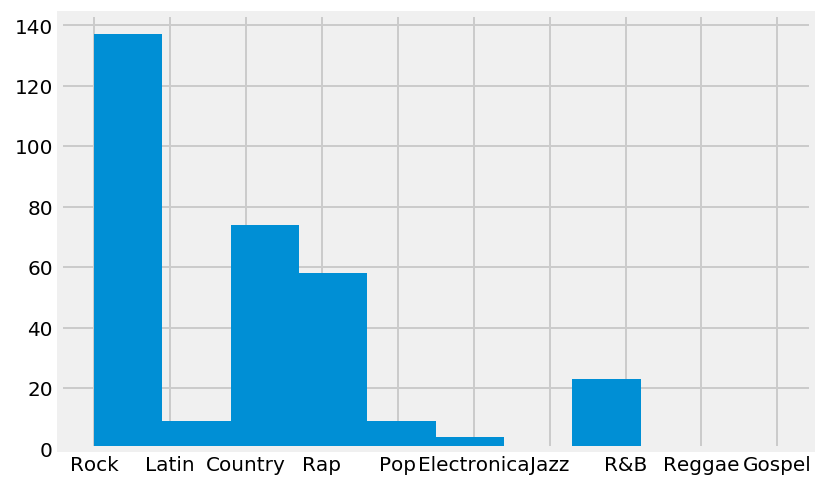

In [203]:
# Historgram by genre
df['genre'].hist();

In [204]:
# genre as a percentage of total hits
df['genre'].value_counts() / df['genre'].value_counts().sum()

Rock           0.432177
Country        0.233438
Rap            0.182965
R&B            0.072555
Latin          0.028391
Pop            0.028391
Electronica    0.012618
Reggae         0.003155
Jazz           0.003155
Gospel         0.003155
Name: genre, dtype: float64

In [205]:
# genre as a percentage of #1s
No_1_df = df[df['range_of_high'] =='#1']
No_1_df.genre.value_counts() / No_1_df.genre.value_counts().sum()

Rock       0.882353
Country    0.058824
Latin      0.058824
Name: genre, dtype: float64

In [206]:
# genre as a percentage of #2 -#10s
No_2_to_10_df = df[df['range_of_high'] =='#2-10']
No_2_to_10_df.genre.value_counts() / No_2_to_10_df.genre.value_counts().sum()

Rock           0.750000
Rap            0.138889
Latin          0.027778
Electronica    0.027778
Jazz           0.027778
Pop            0.027778
Name: genre, dtype: float64

In [207]:
#artists by genre for #1 tracks only 
No_1_df.groupby(['artist'])['genre'].value_counts()

artist               genre  
Aaliyah              Rock       1
Aguilera, Christina  Rock       2
Carey, Mariah        Rock       1
Creed                Rock       1
Destiny's Child      Rock       2
Iglesias, Enrique    Latin      1
Janet                Rock       1
Lonestar             Country    1
Madonna              Rock       1
N'Sync               Rock       1
Santana              Rock       1
Savage Garden        Rock       1
Sisqo                Rock       1
Vertical Horizon     Rock       1
matchbox twenty      Rock       1
Name: genre, dtype: int64

In [208]:
#artists by genre for all tracks
df['artist'].value_counts()

Jay-Z                5
Houston, Whitney     4
Dixie Chicks, The    4
N'Sync               3
Thomas, Carl         3
                    ..
Kid Rock             1
Estefan, Gloria      1
LL Cool J            1
Trick Daddy          1
Worley, Darryl       1
Name: artist, Length: 228, dtype: int64

In [209]:
df.loc[df['artist'] == 'Jay-Z']

,year,artist,track,time,genre,entered,peaked,x1st.week,x2nd.week,x3rd.week,...,mean_position,weeks_in_charts,highest_position,range_of_high,weeks_at_#1,weeks_in_#top10,seconds,rap_or_other,peaked_timestamp,peaked_seconds
57,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,2000-10-28,2000-12-30,58,45.0,35.0,...,24,21,11,#11-100,0,0,230,Rap,2000-12-30,978134400.0
71,2000,Jay-Z,Big Pimpin',3:55,Rap,2000-04-22,2000-07-08,69,52.0,39.0,...,31,20,18,#11-100,0,0,235,Rap,2000-07-08,963014400.0
192,2000,Jay-Z,Anything,3:41,Rap,2000-02-26,2000-03-11,72,58.0,55.0,...,69,8,55,#11-100,0,0,221,Rap,2000-03-11,952732800.0
226,2000,Jay-Z,Do It Again (Put Ya Hands Up),3:47,Rap,2000-01-15,2000-01-29,95,68.0,65.0,...,82,9,65,#11-100,0,0,227,Rap,2000-01-29,949104000.0
264,2000,Jay-Z,Hey Papi,3:40,Rap,2000-08-12,2000-10-07,98,100.0,98.0,...,88,15,76,#11-100,0,0,220,Rap,2000-10-07,970876800.0


In [211]:
# Percentage of tracks that entered the charts in 1999
def greater_than (y):
    if y > pd.to_datetime('2000-01-01'):
        return True
    else:
        return False
pd.to_datetime(df['entered']).apply(greater_than).value_counts() / pd.to_datetime(df['entered']).apply(greater_than).value_counts().sum()

True     0.829653
False    0.170347
Name: entered, dtype: float64

In [212]:
# weeks in charts
df.groupby(['range_of_high'])['weeks_in_charts'].describe()

,count,mean,std,min,25%,50%,75%,max
range_of_high,,,,,,,,
#1,17.0,30.411765,9.937673,20.0,24.00,26.0,33.0,55.0
#11-100,264.0,14.303030,6.561716,1.0,9.00,15.0,20.0,31.0
#2-10,36.0,28.166667,10.316422,5.0,21.75,27.0,32.0,57.0


In [213]:
#time to peak
df['entry_to_peak_weeks'] = (df['entry_to_peak'].dt.total_seconds()/604800)
df.groupby(['range_of_high'])['entry_to_peak_weeks'].mean()

range_of_high
#1         13.529412
#11-100     6.257576
#2-10      13.444444
Name: entry_to_peak_weeks, dtype: float64

In [214]:
df.head(1)

,year,artist,track,time,genre,entered,peaked,x1st.week,x2nd.week,x3rd.week,...,weeks_in_charts,highest_position,range_of_high,weeks_at_#1,weeks_in_#top10,seconds,rap_or_other,peaked_timestamp,peaked_seconds,entry_to_peak_weeks
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,28,1,#1,11,17,218,Other,2000-11-18,974505600.0,8.0


In [215]:
# CREATE A NEW COLUMN TO INDICATE IF THE GENRE IS RAP OR NOT 

In [216]:
# 1. Create a new column indicating rap or not rap
def rap_or_other (z):
    if z == 'Rap':
        return 'Rap'
    else:
        return 'Other'
df['rap_or_other'] = df['genre'].apply(rap_or_other)


In [217]:
df['rap_or_other'] =='Other'

0       True
1       True
2       True
3       True
4       True
       ...  
312     True
313    False
314     True
315    False
316     True
Name: rap_or_other, Length: 317, dtype: bool

In [218]:
# 2. use this to create two new data frames one for rap and one for not rap
df_rap = df.loc[df['rap_or_other'] == 'Rap']
df_not_rap = df.loc[df['rap_or_other'] == 'Other']

In [219]:
df_rap['seconds'].describe()

count     58.000000
mean     243.396552
std       29.780448
min      158.000000
25%      227.250000
50%      240.000000
75%      257.000000
max      333.000000
Name: seconds, dtype: float64

In [220]:
df_not_rap['seconds'].describe()

count    259.000000
mean     242.208494
std       44.787039
min      156.000000
25%      216.000000
50%      235.000000
75%      257.000000
max      470.000000
Name: seconds, dtype: float64

In [120]:
# Do chart of JZ or Rap peaks against date 

In [221]:
# CHARTING EXAMPLE OF TIME SERIES 

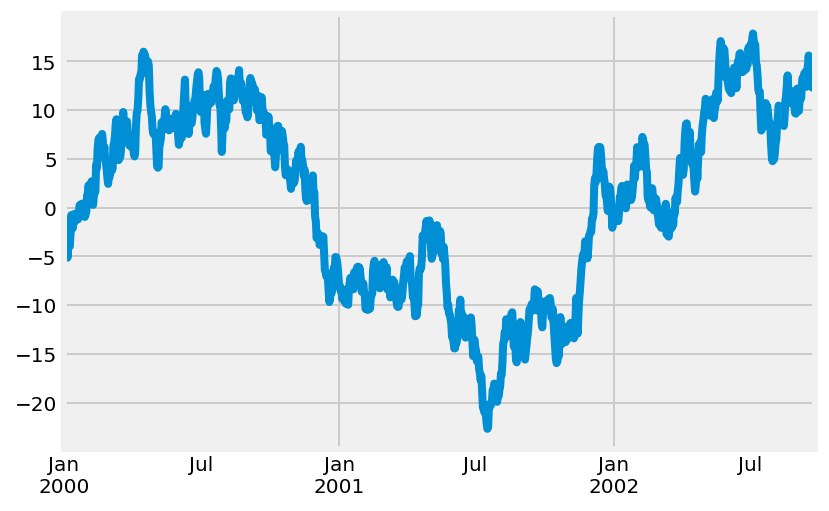

In [222]:
#EXAMPLE
ts = pd.Series(np.random.randn(1000),
    index=pd.date_range('1/1/2000', periods=1000)) 
ts = ts.cumsum()
ts.plot()

In [223]:
# USING THS MODEL 
ts = pd.Series(df['highest_position'],
    index = pd.date_range(['peaked_seconds'], periods=1000) 
ts = ts.cumsum()
ts.plot()

SyntaxError: invalid syntax (<ipython-input-223-840946f688e6>, line 4)

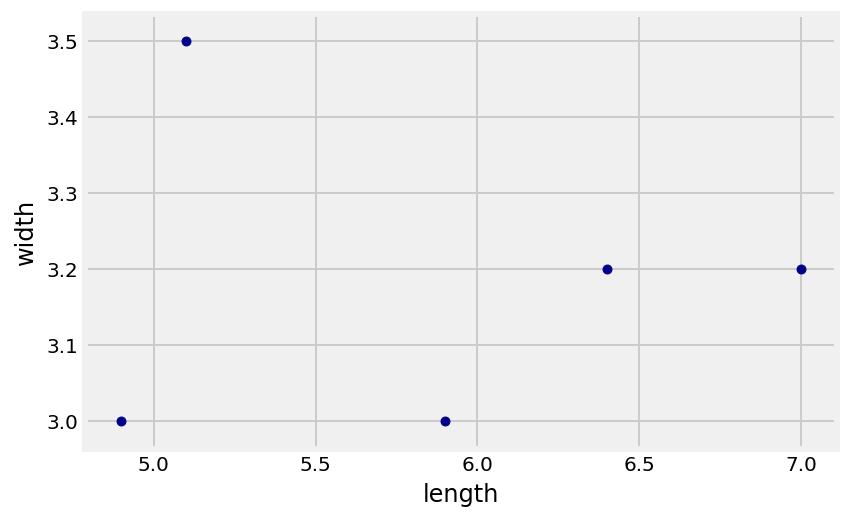

In [224]:
# SCATTER EXAMPLE
>>> df1 = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
...                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
...                   columns=['length', 'width', 'species'])
>>> ax1 = df1.plot.scatter(x='length',
...                       y='width',
...                       c='DarkBlue')

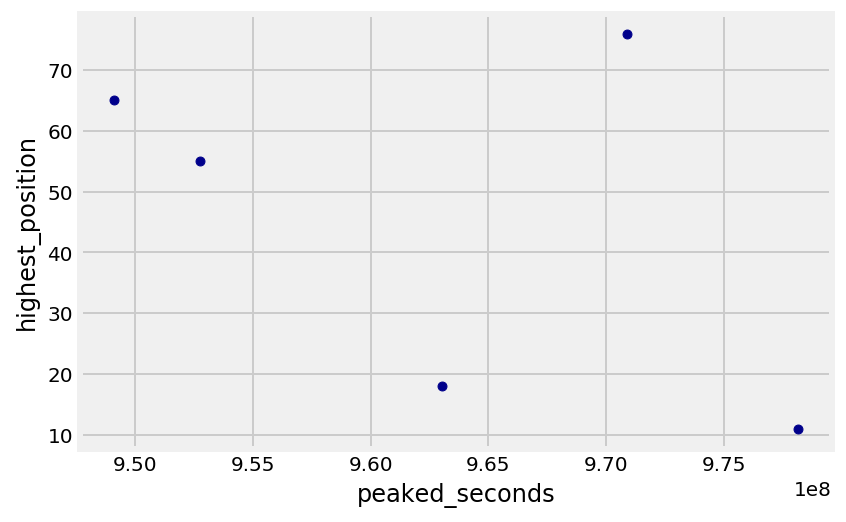

In [225]:
#Jay Z - Peak of track in charts (Time in seconds)
ax1 = df_jay_z.plot.scatter(x='peaked_seconds',
                       y='highest_position',
                       c='DarkBlue')

In [242]:
df.dtypes

year                            int64
artist                         object
track                          object
time                           object
genre                          object
                            ...      
seconds                         int64
rap_or_other                   object
peaked_timestamp       datetime64[ns]
peaked_seconds                float64
entry_to_peak_weeks           float64
Length: 95, dtype: object

In [234]:
type(df.peaked_timestamp)

pandas.core.series.Series

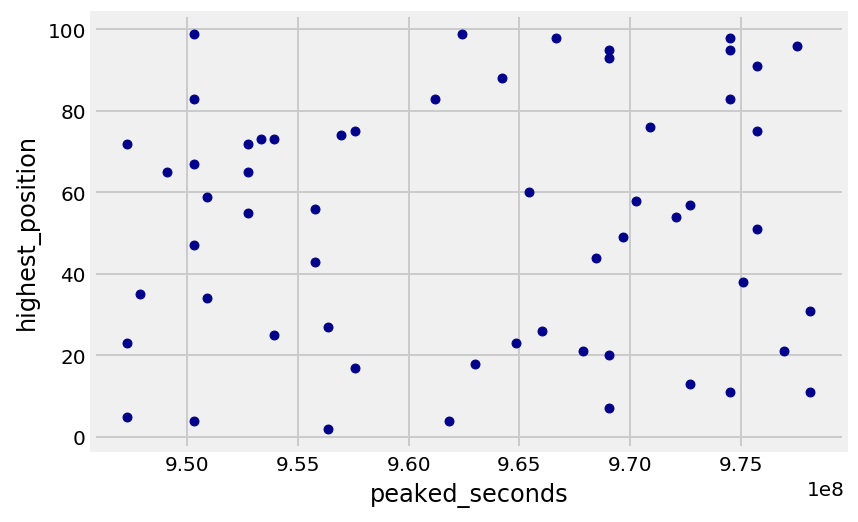

In [226]:
#Rap - Peak of track in charts (Time in seconds)
ax1 = df_rap.plot.scatter(x='peaked_seconds',
                       y='highest_position',
                       c='DarkBlue')

In [227]:
df.iloc[:,83:96].corr()

,mean_position,weeks_in_charts,highest_position,weeks_at_#1,weeks_in_#top10,seconds,peaked_seconds,entry_to_peak_weeks
mean_position,1.000000,-0.765797,0.966857,-0.321579,-0.638580,0.025891,0.003523,-0.585243
weeks_in_charts,-0.765797,1.000000,-0.774181,0.221171,0.647714,-0.024238,0.072656,0.859446
highest_position,0.966857,-0.774181,1.000000,-0.260376,-0.558032,-0.006682,0.026137,-0.600789
weeks_at_#1,-0.321579,0.221171,-0.260376,1.000000,0.519212,-0.028103,0.015974,0.105230
weeks_in_#top10,-0.638580,0.647714,-0.558032,0.519212,1.000000,-0.025188,0.005508,0.507283
seconds,0.025891,-0.024238,-0.006682,-0.028103,-0.025188,1.000000,-0.148202,-0.030023
peaked_seconds,0.003523,0.072656,0.026137,0.015974,0.005508,-0.148202,1.000000,0.047111
entry_to_peak_weeks,-0.585243,0.859446,-0.600789,0.105230,0.507283,-0.030023,0.047111,1.000000


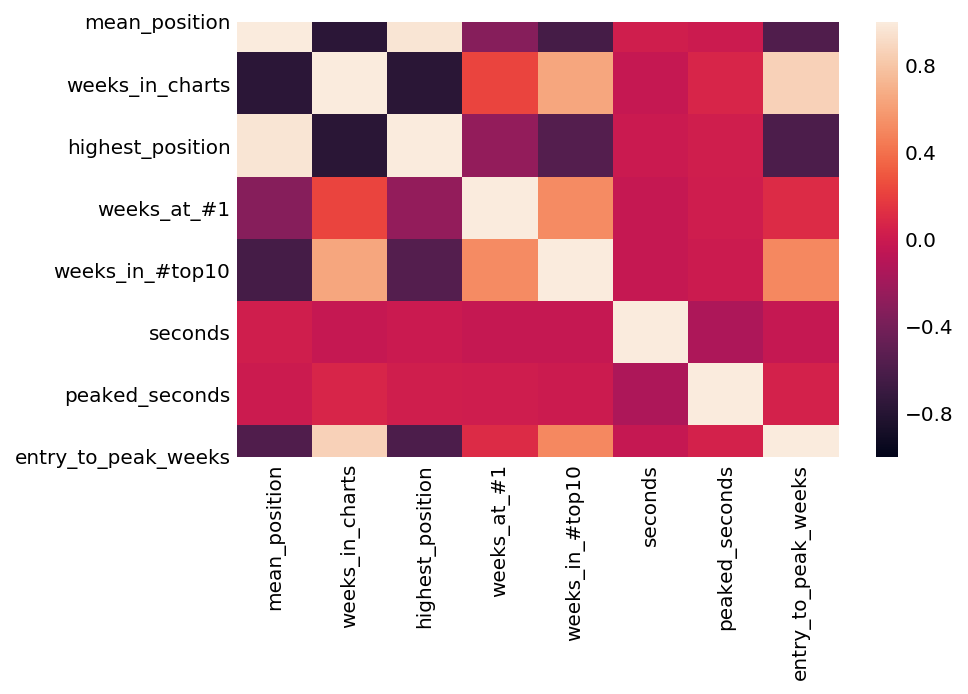

In [228]:
sns.set_palette("coolwarm", 7)
sns.heatmap(df.iloc[:,83:96].corr(), vmin=-1, vmax=1)

In [229]:
df_jay_z.iloc[:,83:96].corr()

,mean_position,weeks_in_charts,highest_position,weeks_at_#1,weeks_in_#top10,seconds,peaked_seconds
mean_position,1.000000,-0.785683,0.998020,NaN,NaN,-0.801077,-0.505766
weeks_in_charts,-0.785683,1.000000,-0.758943,NaN,NaN,0.656602,0.839812
highest_position,0.998020,-0.758943,1.000000,NaN,NaN,-0.820404,-0.463850
weeks_at_#1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weeks_in_#top10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seconds,-0.801077,0.656602,-0.820404,NaN,NaN,1.000000,0.169293
peaked_seconds,-0.505766,0.839812,-0.463850,NaN,NaN,0.169293,1.000000


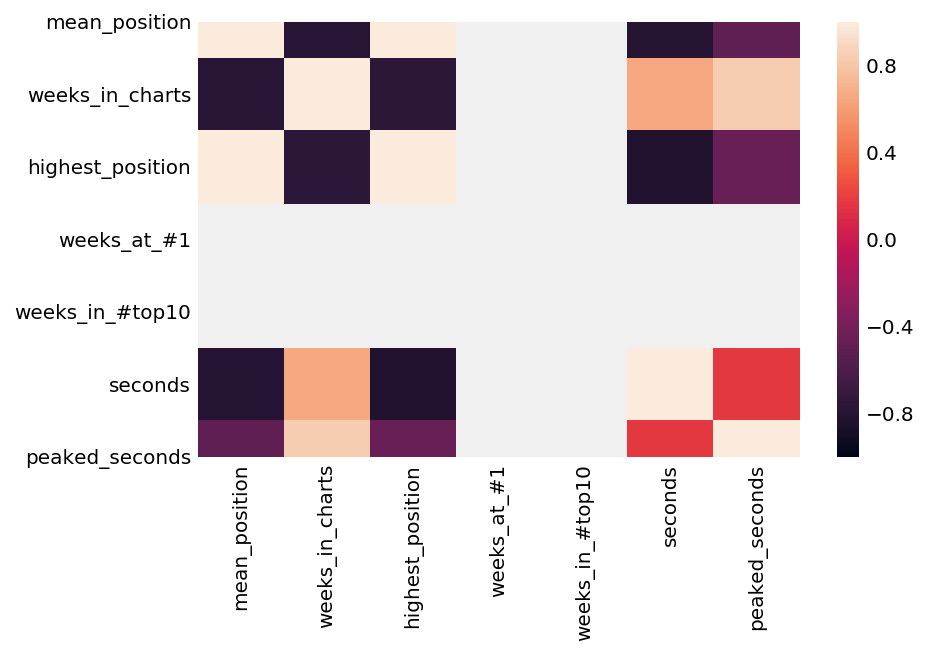

In [230]:
sns.set_palette("coolwarm", 7)
sns.heatmap(df_jay_z.iloc[:,83:96].corr(), vmin=-1, vmax=1)

In [240]:
#Rap - Peak of track in charts (Time in seconds)
ax1 = df_rap.plot.scatter(x='peaked',
                       y='highest_position',
                       c='DarkBlue')

ValueError: scatter requires x column to be numeric

In [241]:
df['peaked'].dtypes

dtype('O')